In [79]:
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree

In [24]:
seed = 10  
lymphdata = pd.read_csv('lymphdata.csv') 
print(lymphdata.head(10)) 

   3  4  2  1  1.1  1.2  1.3  1.4  2.1  1.5  2.2  2.3  2.4  4.1  8  1.6  1.7  \
0  2  3  2  1    1    2    2    1    2    1    3    3    2    3  4    2    2   
1  3  3  2  2    2    2    2    2    2    1    4    3    3    4  8    3    2   
2  3  3  1  1    1    1    2    1    2    1    3    3    4    4  4    3    1   
3  2  3  1  1    1    1    1    1    1    1    2    2    4    3  5    1    2   
4  2  2  1  1    1    1    1    1    2    1    3    3    3    3  6    3    1   
5  2  2  2  1    1    1    1    1    2    1    2    3    2    3  8    2    1   
6  2  3  2  1    1    1    2    1    2    1    2    2    2    2  1    3    1   
7  3  2  2  1    1    1    1    1    2    1    3    2    2    2  8    3    1   
8  3  2  1  1    1    1    1    1    2    1    2    2    3    3  5    3    1   
9  2  2  2  2    1    2    2    1    2    1    3    2    4    3  5    1    2   

   2.5  2.6  
0    2    2  
1    2    7  
2    2    6  
3    2    1  
4    2    4  
5    1    1  
6    1    1  
7    2 

In [25]:
lymphdata = lymphdata.drop(columns=['2.5'])
lymphdata = lymphdata.drop(columns=['2.6'])
print(lymphdata.head(10))

   3  4  2  1  1.1  1.2  1.3  1.4  2.1  1.5  2.2  2.3  2.4  4.1  8  1.6  1.7
0  2  3  2  1    1    2    2    1    2    1    3    3    2    3  4    2    2
1  3  3  2  2    2    2    2    2    2    1    4    3    3    4  8    3    2
2  3  3  1  1    1    1    2    1    2    1    3    3    4    4  4    3    1
3  2  3  1  1    1    1    1    1    1    1    2    2    4    3  5    1    2
4  2  2  1  1    1    1    1    1    2    1    3    3    3    3  6    3    1
5  2  2  2  1    1    1    1    1    2    1    2    3    2    3  8    2    1
6  2  3  2  1    1    1    2    1    2    1    2    2    2    2  1    3    1
7  3  2  2  1    1    1    1    1    2    1    3    2    2    2  8    3    1
8  3  2  1  1    1    1    1    1    2    1    2    2    3    3  5    3    1
9  2  2  2  2    1    2    2    1    2    1    3    2    4    3  5    1    2


In [35]:
lymphdata.to_csv('lymphdata_clean.csv', index=False)

In [41]:
lymphdata_clean = pd.read_csv('lymphdata_clean.csv')
print(lymphdata_clean)

     3  4  2  1  1.1  1.2  1.3  1.4  2.1  1.5  2.2  2.3  2.4  4.1  8  1.6  1.7
0    2  3  2  1    1    2    2    1    2    1    3    3    2    3  4    2    2
1    3  3  2  2    2    2    2    2    2    1    4    3    3    4  8    3    2
2    3  3  1  1    1    1    2    1    2    1    3    3    4    4  4    3    1
3    2  3  1  1    1    1    1    1    1    1    2    2    4    3  5    1    2
4    2  2  1  1    1    1    1    1    2    1    3    3    3    3  6    3    1
..  .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ..  ...  ...
142  3  3  2  1    1    2    2    1    2    1    2    2    4    3  5    2    2
143  2  2  1  1    1    1    1    1    1    1    1    1    1    1  3    1    2
144  3  2  2  1    1    1    2    1    2    1    3    3    3    3  8    3    2
145  2  2  1  1    1    1    1    1    2    1    2    2    4    2  2    1    2
146  2  2  2  2    1    2    2    1    2    1    3    3    4    3  4    3    2

[147 rows x 17 columns]


In [44]:
lymphdata_clean.dtypes

3      int64
4      int64
2      int64
1      int64
1.1    int64
1.2    int64
1.3    int64
1.4    int64
2.1    int64
1.5    int64
2.2    int64
2.3    int64
2.4    int64
4.1    int64
8      int64
1.6    int64
1.7    int64
dtype: object

In [46]:
le = LabelEncoder() 
le.fit(lymphdata_clean['3'].values)

LabelEncoder()

In [48]:
y = le.transform(lymphdata_clean['3'].values) 

In [51]:
X = lymphdata_clean.drop('8', axis=1).values 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.47, stratify=y, random_state=seed)

In [57]:
lymphdata_clean = DecisionTreeClassifier(criterion="gini", random_state=42)
lymphdata_clean.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
y_pred = lymphdata_clean.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)

In [63]:
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


In [67]:
tree = DecisionTreeClassifier(criterion='gini', 
min_samples_leaf=5, 
min_samples_split=5, 
max_depth=None, 
random_state=seed)

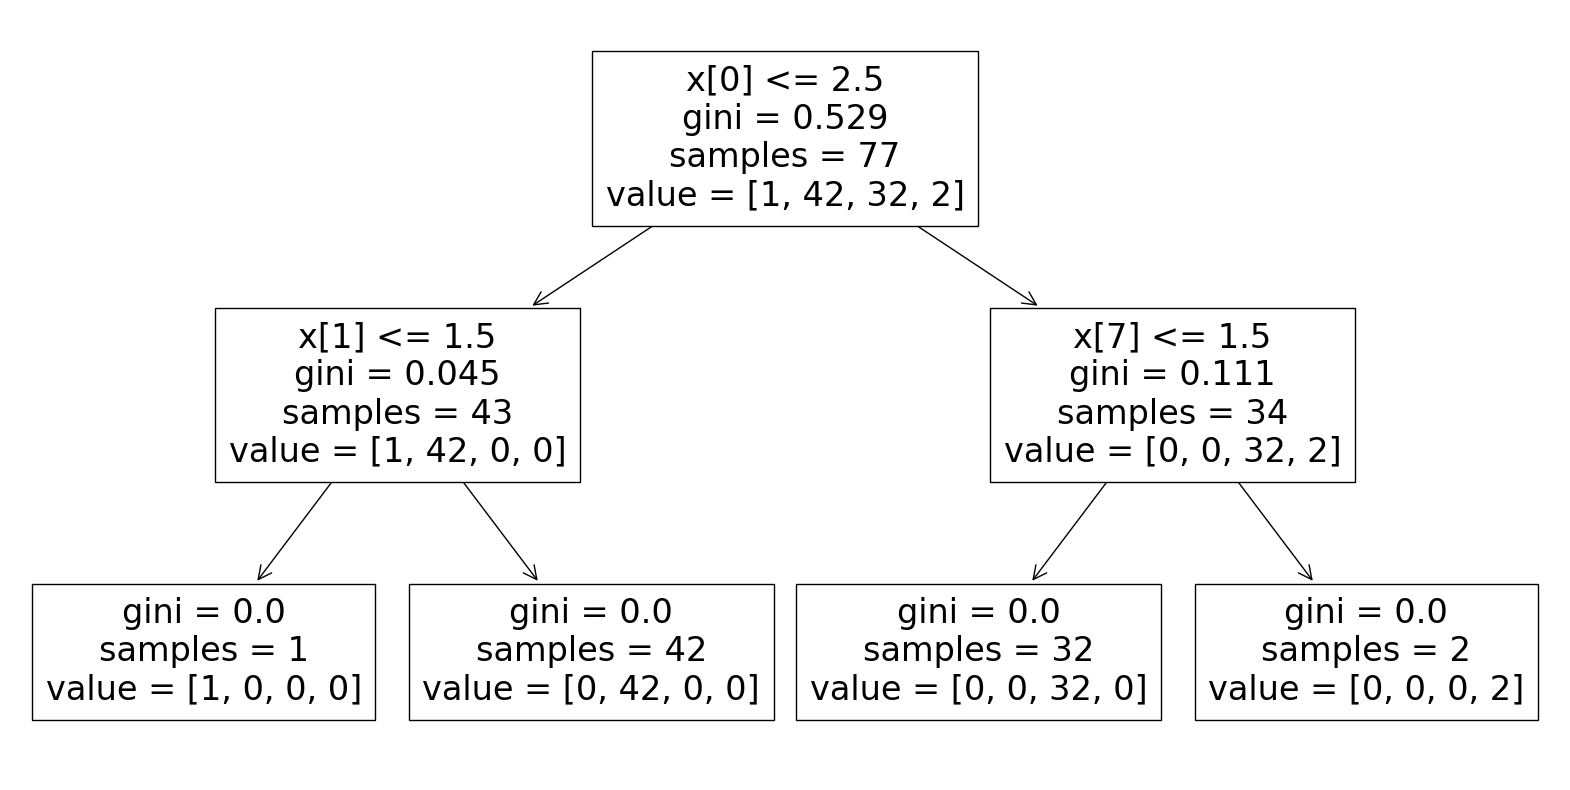

In [88]:
plt.figure(figsize=(20, 10))
tree.plot_tree(lymphdata_clean)
plt.show()